In [4]:
from itertools import count
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from PIL import Image
import hashlib
from collections import Counter
from sklearn.model_selection import train_test_split

C:\Users\SARASWATI\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load dataset
ds = load_dataset("Hemg/AI-Generated-vs-Real-Images-Datasets")
train_data = ds["train"]

print(ds)
print("Total samples:", len(train_data))


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 152710
    })
})
Total samples: 152710


In [6]:
print(train_data.features)


{'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['AiArtData', 'RealArt'])}


In [7]:
labels_clean = np.array(train_data["label"])


In [ ]:
import numpy as np

# Extract images (keep as PIL images, safe for now)
images = [item["image"] for item in train_data]

# Extract labels correctly (dataset uses "label")
labels_clean = np.array(train_data["label"])

# Find indices of each class
class0_idx = np.where(labels_clean == 0)[0]   # AiArtData
class1_idx = np.where(labels_clean == 1)[0]   # RealArt

# Sample 1000 from each class
SAMPLE = 1000
sel0 = np.random.choice(class0_idx, SAMPLE, replace=False)
sel1 = np.random.choice(class1_idx, SAMPLE, replace=False)

# Combine indices
final_idx = np.concatenate([sel0, sel1])

# Reduced dataset (still PIL images)
images_small = [images[i] for i in final_idx]
labels_small = labels_clean[final_idx]


print("Reduced dataset size:", len(images_small), len(labels_small))


Reduced dataset size: 2000 2000


In [9]:
images = images_small
labels_clean = labels_small


In [10]:
print(len(images))            # gives 2000
print(labels_clean.shape)     # gives (2000,)


2000
(2000,)


In [11]:
unique, counts = np.unique(labels_clean, return_counts=True)
print(unique, counts)


[0 1] [1000 1000]


In [12]:
print(type(labels_clean), labels_clean)


<class 'numpy.ndarray'> [0 0 0 ... 1 1 1]


In [13]:
from PIL import Image

# Use REDUCED dataset instead of full dataset
images = images_small    # 2000 images
labels_clean = labels_small

valid_indices = []

for i, img in enumerate(images):
    # img is already a PIL image (from reduced dataset)
    if not isinstance(img, Image.Image):
        try:
            img = Image.open(img)
        except Exception as e:
            print(f"❌ Corrupted image at index {i}: {e}")
            continue

    valid_indices.append(i)

print(f"✔ Valid images: {len(valid_indices)} / {len(images)}\n")


✔ Valid images: 2000 / 2000



In [14]:
from collections import Counter

label_counts = Counter(labels_small)
print("📌 Reduced Label Distribution:", label_counts)


📌 Reduced Label Distribution: Counter({np.int64(0): 1000, np.int64(1): 1000})


In [15]:
print("Does images exist?", 'images' in globals())
print("Does labels_clean exist?", 'labels_clean' in globals())


Does images exist? True
Does labels_clean exist? True


Total classes: 2
Class 0: 1000 images
Class 1: 1000 images


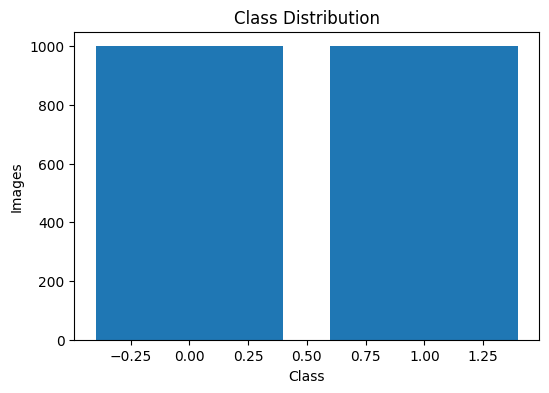

In [16]:
unique_classes, counts = np.unique(labels_clean, return_counts=True)

print("Total classes:", len(unique_classes))
for c, n in zip(unique_classes, counts):
    print(f"Class {c}: {n} images")

plt.figure(figsize=(6,4))
plt.bar(unique_classes, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Images")
plt.show()


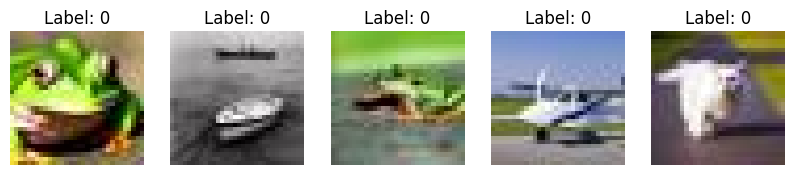

In [96]:
num_samples = min(5, len(images))

plt.figure(figsize=(10,4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels_clean[i]}")
    plt.axis("off")

plt.show(block=False)
plt.pause(2)
plt.close()


In [93]:
X = images_array
y = labels_small

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [38]:
import numpy as np
from PIL import Image

images_array = []

for img in images:
    # Ensure PIL
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)

    # Convert all images to RGB (fixes grayscale / RGBA / CMYK)
    img = img.convert("RGB")

    # Resize
    img_resized = img.resize((224, 224))

    # Convert to NumPy
    img_np = np.array(img_resized)

    images_array.append(img_np)

# Convert list → NumPy array
images_array = np.array(images_array)

print("Final shape:", images_array.shape)
print(type(images_array))


Final shape: (2000, 224, 224, 3)
<class 'numpy.ndarray'>


In [39]:
X = images_array
y = labels_small

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [91]:
print(len(images))
print(type(images[0]))
print(images[0].size)   # (width, height)
print(images[0].mode)   # RGB / L etc.


2000
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(32, 32)
RGB


In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

# Use reduced dataset (after resizing, NumPy array)
X = images_array        # shape: (2000, 224, 224, 3)
y = labels_small        # shape: (2000,)

# Verify shapes
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("✔ Train set:", X_train.shape, y_train.shape)
print("✔ Test set:", X_test.shape, y_test.shape)


Images shape: (2000, 224, 224, 3)
Labels shape: (2000,)
✔ Train set: (1600, 224, 224, 3) (1600,)
✔ Test set: (400, 224, 224, 3) (400,)


In [45]:
from PIL import Image
import numpy as np

TARGET_SIZE = (224, 224)

# Resize and convert all reduced images to NumPy arrays
images_array = np.array([
    np.array(img.resize(TARGET_SIZE).convert("RGB"), dtype=np.float32)
    for img in images_small
])

# Now you can compute statistics
print("Min pixel:", images_array.min())
print("Max pixel:", images_array.max())
print("Mean pixel:", images_array.mean())
print("Std pixel:", images_array.std())


Min pixel: 0.0
Max pixel: 255.0
Mean pixel: 112.916405
Std pixel: 65.026306


In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CNN Model for reduced dataset (224x224 RGB images)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')   # binary classes
])

model.summary()


C:\Users\SARASWATI\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [48]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [50]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 720ms/step - accuracy: 0.5078 - loss: 0.8300 - val_accuracy: 0.6062 - val_loss: 0.6487
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 706ms/step - accuracy: 0.5859 - loss: 0.6545 - val_accuracy: 0.6531 - val_loss: 0.6206
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 690ms/step - accuracy: 0.6023 - loss: 0.6414 - val_accuracy: 0.6594 - val_loss: 0.6351
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 683ms/step - accuracy: 0.6391 - loss: 0.6185 - val_accuracy: 0.6281 - val_loss: 0.6347
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 696ms/step - accuracy: 0.6789 - loss: 0.5919 - val_accuracy: 0.7094 - val_loss: 0.5906
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 689ms/step - accuracy: 0.7164 - loss: 0.5433 - val_accuracy: 0.6438 - val_loss: 0.6381
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 682ms/step - accuracy: 0.7656 - loss: 0.5011 - val_accuracy: 0.7219 - val_loss: 0.5668
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 689ms/step - accuracy: 0.7969 - loss: 0.4382 - val_accu

In [51]:
from sklearn.model_selection import KFold


In [52]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [53]:
num_classes = len(np.unique(labels_clean))


In [54]:
from PIL import Image
import numpy as np

TARGET_SIZE = (224, 224)

images_resized = np.array([
    np.array(img.resize(TARGET_SIZE).convert("RGB"))
    for img in images_small
], dtype=np.float32)

print("Resized images shape:", images_resized.shape)


Resized images shape: (2000, 224, 224, 3)


In [55]:
from sklearn.model_selection import train_test_split

X = images_resized
y = labels_small

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (1600, 224, 224, 3) (1600,)
Test : (400, 224, 224, 3) (400,)


In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


C:\Users\SARASWATI\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
print("Model Input Shape:", model.input_shape)
print("X_test Shape:", X_test.shape)


Model Input Shape: (None, 64, 64, 3)
X_test Shape: (400, 224, 224, 3)


In [58]:
print("➡ MODEL INPUT SHAPE:", model.input_shape)


➡ MODEL INPUT SHAPE: (None, 64, 64, 3)


In [59]:
X_test_64 = tf.image.resize(X_test, (64, 64)).numpy()


In [60]:
print(model.input_shape)


(None, 64, 64, 3)


In [61]:
del X_train, X_test, y_train, y_test


In [62]:
print(model.input_shape)


(None, 64, 64, 3)


In [74]:
images_resized = []

for img in images_small:

    # Convert PIL to RGB always (fix grayscale, RGBA, CMYK)
    img = img.convert("RGB")

    # Convert to NumPy array
    img_np = np.array(img, dtype=np.float32)

    # Now resize using TF (works because shape is valid)
    img_resized = tf.image.resize(img_np, (64, 64)).numpy()

    images_resized.append(img_resized)

# Stack and normalize
images_resized = np.stack(images_resized) / 255.0


In [77]:
# Convert labels list → NumPy array
labels_array = np.array(labels_small)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images_resized,     # your resized images
    labels_array,        # labels
    test_size=0.2,
    random_state=42,
    stratify=labels_array
)




In [78]:
X_test_resized = tf.image.resize(
    np.array([np.array(img) for img in X_test], dtype=np.float32),
    (64, 64)
).numpy() / 255.0


In [79]:
import tensorflow as tf
import numpy as np

# Convert list of PIL images to NumPy array
X_test_np = np.array([np.array(img) for img in X_test], dtype=np.float32)

# Resize to 64x64
X_test_resized = tf.image.resize(X_test_np, (64, 64)).numpy()

# Normalize (optional)
X_test_resized = X_test_resized / 255.0


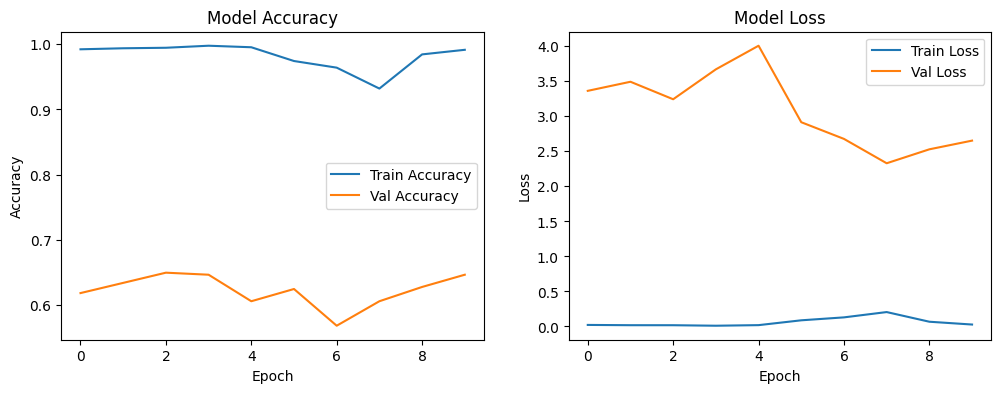


Test Loss: 3.5634
Test Accuracy: 0.6325

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11.9375..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.125..195.4375].


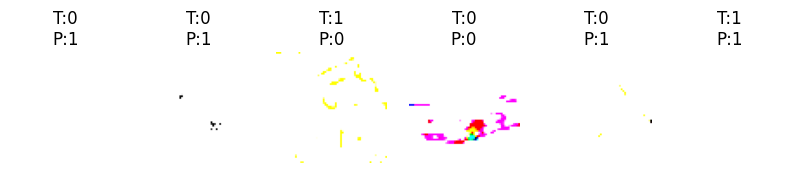

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


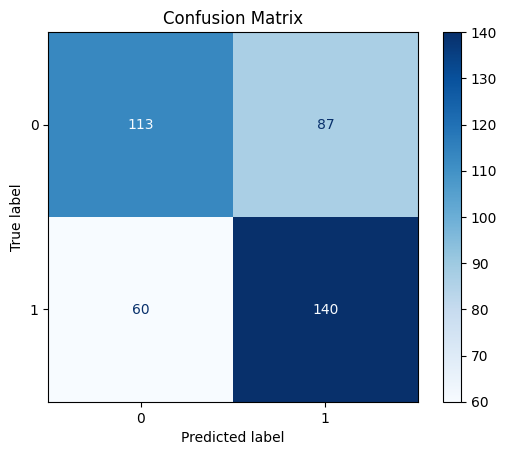

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# ------------------------------
# Resize Test Images
# ------------------------------
X_test_resized = tf.image.resize(X_test, (64, 64)).numpy()

# ------------------------------
# 1️⃣ Plot Training History
# ------------------------------
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ------------------------------
# 2️⃣ Evaluate on Test Set
# ------------------------------
loss, accuracy = model.evaluate(X_test_resized, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}\n")

# ------------------------------
# 3️⃣ Sample Predictions
# ------------------------------
sample_images = X_test_resized[:6]
sample_labels = y_test[:6]

pred = model.predict(sample_images)
pred_labels = (pred > 0.5).astype(int).flatten()

plt.figure(figsize=(10,3))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(sample_images[i])
    plt.title(f"T:{sample_labels[i]}\nP:{pred_labels[i]}")
    plt.axis("off")
plt.show()

# ------------------------------
# 4️⃣ Confusion Matrix
# ------------------------------
y_pred = (model.predict(X_test_resized) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [109]:
import numpy as np
from PIL import Image
import tensorflow as tf

X_fixed = []

for img in X:

    # -----------------------------------------------
    # CASE 1: Already a NumPy array
    # -----------------------------------------------
    if isinstance(img, np.ndarray):

        # Skip invalid tiny arrays like (1,1,3)
        if img.ndim != 3 or img.shape[0] < 10 or img.shape[1] < 10:
            continue  # skip corrupted images

        # Ensure float32 before resize
        img = img.astype(np.float32)

        # Resize using TF
        img_resized = tf.image.resize(img, (224, 224)).numpy()

        X_fixed.append(img_resized)
        continue

    # -----------------------------------------------
    # CASE 2: PIL image
    # -----------------------------------------------
    if isinstance(img, Image.Image):
        img = img.convert("RGB")
        img = img.resize((224, 224))
        img_np = np.array(img, dtype=np.float32)
        X_fixed.append(img_np)
        continue

    # -----------------------------------------------
    # CASE 3: Unknown type → SKIP
    # -----------------------------------------------
    print("Skipping invalid item:", type(img))


# Final array
X = np.array(X_fixed, dtype="float32") / 255.0


In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# ------------------- PREPROCESS FIX -------------------
def resize_images(arr):
    arr = np.array(arr)
    if arr.ndim == 4 and arr.shape[1] != 64:
        print(f"Resizing from {arr.shape[1]}x{arr.shape[2]} -> 64x64")
        arr = tf.image.resize(arr, (64, 64)).numpy()
    return arr
# ------------------------------------------------------

# If X_train exists, use it directly
if "X_train" in globals() and "y_train" in globals():
    X_tr, y_tr = X_train, y_train

else:
    # Otherwise pick a dataset
    if "images_small" in globals():
        X_all, y_all = images_small, labels_small

    elif "images_balanced" in globals():
        X_all, y_all = images_balanced, labels_balanced

    elif "images" in globals():
        X_all, y_all = images, labels_clean

    else:
        raise NameError("Dataset not found.")

    X_all = np.array(X_all)
    y_all = np.array(y_all).reshape(-1)

    if X_all.max() > 1.5:
        X_all = X_all / 255.0

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
    )

# 🔥 Resize training data
X_tr = resize_images(X_tr)

# 🔥 Resize test data only if it exists
if "X_te" in globals():
    X_te = resize_images(X_te)

# Labels must be int
y_tr = np.array(y_tr).astype(int)

# Train model
history = model.fit(
    X_tr,
    y_tr,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

print("Training completed!")


Resizing from 224x224 -> 64x64
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9922 - loss: 0.0224 - val_accuracy: 0.6187 - val_loss: 3.3632
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9937 - loss: 0.0185 - val_accuracy: 0.6344 - val_loss: 3.4928
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accuracy: 0.6500 - val_loss: 3.2431
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy: 0.6469 - val_loss: 3.6701
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9953 - loss: 0.0194 - val_accuracy: 0.6062 - val_loss: 4.0071
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9742 - loss: 0.0883 - val_accuracy: 0.6250 - val_loss: 2.9153
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9641 - loss: 0.1302 - val_accuracy: 0.5688 - val_loss: 2.6773
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9320 - loss: 0.